In [1]:
from os.path import join
import torch
import numpy as np
import pandas as pd
import dask.dataframe as dd

/home/exw7227/.local/lib/python3.10/site-packages/cupy/_environment.py:445: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda112, cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path.append("/projects/b1042/GoyalLab/jaekj/SCTAB_FINAL/scTab-devel/notebooks/model_evaluation")
from utils import correct_labels

In [3]:
CKPT_PATH = "/home/exw7227/jaekj/SCTAB_FINAL/Model_softmax/Sample_300_T_1000_Path_2"
y_pred = np.load(join(CKPT_PATH, 'y_pred_test.npy'))
y_true = np.load(join(CKPT_PATH, 'y_true_test.npy'))

In [4]:
y_true = np.asarray(y_true, dtype=np.int64).ravel()
y_pred = np.asarray(y_pred, dtype=np.int64).ravel()

In [5]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predict on test set
# Evaluate performance
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-score: {f1:.4f}")
print("Classification Report:")
print(report)

Test Accuracy: 0.9167
Test F1-score: 0.9210
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           3       0.88      0.88      0.88         8
           4       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      0.60      0.75         5
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         1
          10       0.83      0.77      0.80        13
          12       0.50      1.00      0.67         1
          14       0.89      0.77      0.83        22
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         9
          22       0.92      1.00      0.96        12
          23       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         0
          26  

/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

clf_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).T
clf_report_overall = clf_report.iloc[-3:].copy()
clf_report_per_class = clf_report.iloc[:-3].copy()

clf_report_overall

/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/exw7227/.

,precision,recall,f1-score,support
accuracy,0.916667,0.916667,0.916667,0.916667
macro avg,0.866790,0.870385,0.854956,300.000000
weighted avg,0.942590,0.916667,0.920983,300.000000


In [20]:
DATA_PATH = '/projects/b1042/GoyalLab/jaekj/merlin_cxg_2023_05_15_sf-log1p'
cell_type_mapping = pd.read_parquet(join(DATA_PATH, 'categorical_lookup/cell_type.parquet'))

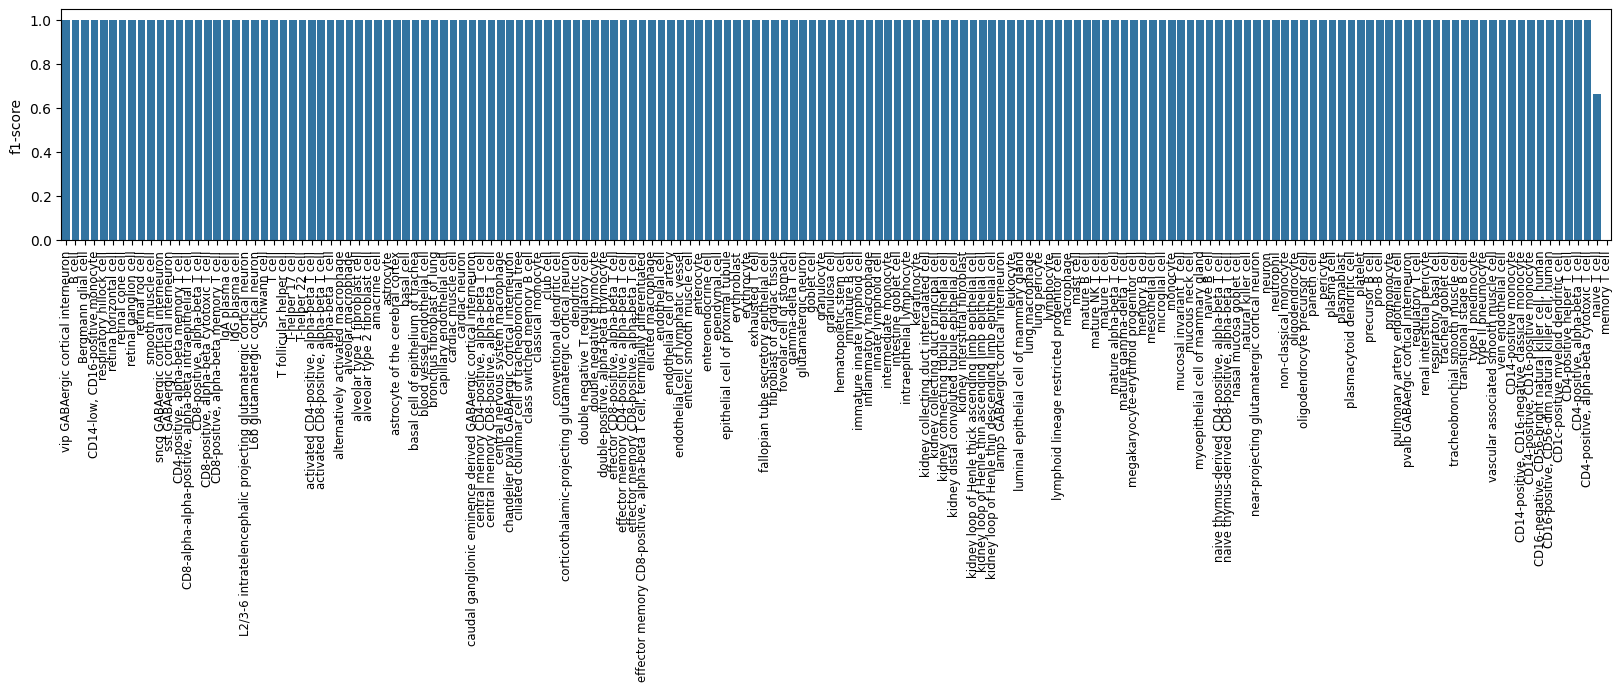

In [21]:
plt.rcParams['figure.figsize'] = (20, 3)

ax = sns.barplot(
    data=(
        clf_report_per_class
        .assign(
            cell_type=lambda df: df.index.to_series().astype(int).replace(cell_type_mapping['label'].to_dict())
        )
        .sort_values('f1-score', ascending=False)
    ),
    x='cell_type',
    y='f1-score',
    color='#1f77b4'
)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize='small');

In [7]:
cm = confusion_matrix(unique_test_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'unique_test_labels' is not defined